In [1]:
import json

In [2]:
with open("../data/bbox/bbox_1.json") as file:
    data = json.load(file)

In [3]:
coords = data['geometry']['coordinates'][0]

In [4]:
bl = (min(row[0] for row in coords), min(row[1] for row in coords))

In [5]:
tr = (max(row[0] for row in coords), max(row[1] for row in coords))

In [6]:
bl, tr

((139.80422419574927, -18.53892243541918),
 (139.83921043586588, -18.505748486987144))

In [7]:
from sentinelhub import SentinelHubRequest, SentinelHubDownloadClient, BBox, CRS, DataCollection, MimeType, SHConfig
from dotenv import load_dotenv
import os

In [8]:
load_dotenv()

True

In [9]:
config = SHConfig()
config.sh_client_id = os.getenv("CLIENT_ID")
config.sh_client_secret = os.getenv("CLIENT_SECRET")

In [10]:
import matplotlib.pyplot as plt
import numpy as np


def plot_image(image, factor, clip_range, **kwargs):
    """Utility function for plotting RGB images."""
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    if clip_range is not None:
        ax.imshow(np.clip(image * factor, *clip_range), **kwargs)
    else:
        ax.imshow(image * factor, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])

In [30]:
bbox = BBox((bl, tr), crs=CRS.WGS84)
size = (700, 466)
time_interval = "2023-08-30", "2023-08-30"
data_folder = "../sat_imgs"

evalscript_true_color = """
//VERSION=3

function setup() {
    return {
        input: [{
            bands: ["B02", "B03", "B04"]
        }],
        output: {
            bands: 3
        }
    };
}

function evaluatePixel(sample) {
    return [sample.B04, sample.B03, sample.B02];
}
"""

request = SentinelHubRequest(
    data_folder = data_folder,
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A,
            time_interval=time_interval,
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=bbox,
    size=size,
    config=config,
)

image = request.get_data(save_data = True, show_progress=True)

  0%|          | 0/1 [00:00<?, ?it/s]

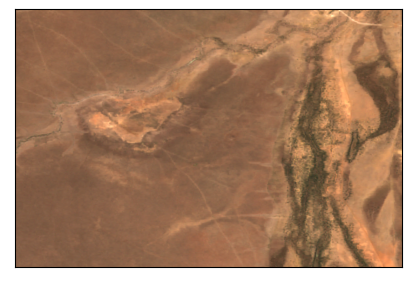

In [26]:
plot_image(image[0], factor=3.5 / 255, clip_range=(0, 1))

In [27]:
for folder, _, filenames in os.walk(request.data_folder):
    for filename in filenames:
        print(os.path.join(folder, filename))

../sat_imgs/c3ab3b16fc20b7e57b5fc121401085b7/request.json
../sat_imgs/c3ab3b16fc20b7e57b5fc121401085b7/response.png


In [28]:
import argparse